In [1]:
import pandas as pd
print("Pandas library imported successfully.")

Pandas library imported successfully.


In [2]:
import requests

# Define the URL for the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip'

# Define the path to save the zip file and extracted file
zip_file_path = 'smsspamcollection.zip'
data_file_path = 'SMSSpamCollection'

# Download the zip file if it doesn't exist
try:
    import os
    if not os.path.exists(zip_file_path):
        print(f"Downloading dataset from {url}...")
        response = requests.get(url)
        response.raise_for_status() # Raise an exception for HTTP errors
        with open(zip_file_path, 'wb') as f:
            f.write(response.content)
        print("Download complete.")
    else:
        print("Zip file already exists.")

    # Extract the SMSSpamCollection file if it doesn't exist
    if not os.path.exists(data_file_path):
        print(f"Extracting {data_file_path} from {zip_file_path}...")
        import zipfile
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            zip_ref.extractall('.')
        print("Extraction complete.")
    else:
        print("Dataset file already exists.")

    # Load the dataset into a pandas DataFrame
    # The dataset is tab-separated and has no header
    df = pd.read_csv(data_file_path, sep='\t', header=None, names=['label', 'message'])

    # Display the first few rows and the shape of the DataFrame
    print("\nFirst 5 rows of the dataset:")
    print(df.head())
    print(f"\nShape of the dataset: {df.shape}")

except requests.exceptions.RequestException as e:
    print(f"Error downloading the dataset: {e}")
except zipfile.BadZipFile as e:
    print(f"Error extracting the zip file: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Download complete.
Extracting SMSSpamCollection from smsspamcollection.zip...
Extraction complete.

First 5 rows of the dataset:
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

Shape of the dataset: (5572, 2)


In [3]:
import string
import nltk
from nltk.corpus import stopwords

# Download the 'stopwords' corpus if not already downloaded
try:
    stopwords.words('english')
    print("NLTK 'stopwords' corpus is already downloaded.")
except LookupError:
    print("Downloading NLTK 'stopwords' corpus...")
    nltk.download('stopwords')
    print("NLTK 'stopwords' corpus downloaded successfully.")

print("string module and nltk library imported.")

NLTK 'stopwords' corpus downloaded successfully.
string module and nltk library imported.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
import string
from nltk.corpus import stopwords

# Convert all text to lowercase
df['message'] = df['message'].apply(lambda x: x.lower())
print("Messages converted to lowercase.")

# Function to remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

# Apply punctuation removal
df['message'] = df['message'].apply(remove_punctuation)
print("Punctuation removed from messages.")

# Get English stopwords
stop_words = set(stopwords.words('english'))

# Function to remove stopwords
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return " ".join(filtered_words)

# Apply stopword removal
df['message'] = df['message'].apply(remove_stopwords)
print("Stopwords removed from messages.")

# Display the first few rows of the preprocessed DataFrame
print("\nFirst 5 rows of the preprocessed dataset:")
print(df.head())

Messages converted to lowercase.
Punctuation removed from messages.
Stopwords removed from messages.

First 5 rows of the preprocessed dataset:
  label                                            message
0   ham  go jurong point crazy available bugis n great ...
1   ham                            ok lar joking wif u oni
2  spam  free entry 2 wkly comp win fa cup final tkts 2...
3   ham                u dun say early hor u c already say
4   ham        nah dont think goes usf lives around though


In [5]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
count_vectorizer = CountVectorizer()
print("CountVectorizer initialized.")

# Fit and transform the 'message' column
X_count = count_vectorizer.fit_transform(df['message'])
print("Text data transformed using CountVectorizer.")

# Print the shape of the resulting feature matrix
print(f"\nShape of X_count (documents, vocabulary size): {X_count.shape}")

# Get feature names (words) and print the first 10
feature_names = count_vectorizer.get_feature_names_out()
print("\nFirst 10 feature names (words) from CountVectorizer:")
print(feature_names[:10])

CountVectorizer initialized.
Text data transformed using CountVectorizer.

Shape of X_count (documents, vocabulary size): (5572, 9437)

First 10 feature names (words) from CountVectorizer:
['008704050406' '0089my' '0121' '01223585236' '01223585334' '0125698789'
 '02' '020603' '0207' '02070836089']


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
print("TfidfVectorizer initialized.")

# Fit and transform the 'message' column
X_tfidf = tfidf_vectorizer.fit_transform(df['message'])
print("Text data transformed using TfidfVectorizer.")

# Print the shape of the resulting feature matrix
print(f"\nShape of X_tfidf (documents, vocabulary size): {X_tfidf.shape}")

# Get feature names (words) and print the first 10
feature_names_tfidf = tfidf_vectorizer.get_feature_names_out()
print("\nFirst 10 feature names (words) from TfidfVectorizer:")
print(feature_names_tfidf[:10])

TfidfVectorizer initialized.
Text data transformed using TfidfVectorizer.

Shape of X_tfidf (documents, vocabulary size): (5572, 9437)

First 10 feature names (words) from TfidfVectorizer:
['008704050406' '0089my' '0121' '01223585236' '01223585334' '0125698789'
 '02' '020603' '0207' '02070836089']


Necessary modules imported: train_test_split, MultinomialNB, accuracy_score, confusion_matrix, classification_report, seaborn, matplotlib.pyplot.

'label' column converted to numerical format (0 for ham, 1 for spam).

Data split into training and testing sets. Training samples: 4457, Testing samples: 1115.
Multinomial Naive Bayes classifier initialized.
Multinomial Naive Bayes model trained using CountVectorizer features.
Predictions made on the test set.

Accuracy Score (CountVectorizer): 0.9749


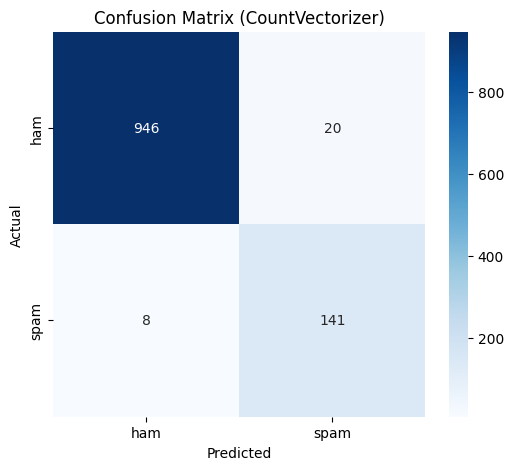

Confusion Matrix generated and visualized.

Classification Report (CountVectorizer):
              precision    recall  f1-score   support

         ham       0.99      0.98      0.99       966
        spam       0.88      0.95      0.91       149

    accuracy                           0.97      1115
   macro avg       0.93      0.96      0.95      1115
weighted avg       0.98      0.97      0.98      1115

Classification Report printed.


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

print("Necessary modules imported: train_test_split, MultinomialNB, accuracy_score, confusion_matrix, classification_report, seaborn, matplotlib.pyplot.")

# Convert 'label' column to numerical format
y = df['label'].map({'ham': 0, 'spam': 1})
print("\n'label' column converted to numerical format (0 for ham, 1 for spam).")

# Split data into training and testing sets
X_train_count, X_test_count, y_train, y_test = train_test_split(X_count, y, test_size=0.2, random_state=42)
print(f"\nData split into training and testing sets. Training samples: {X_train_count.shape[0]}, Testing samples: {X_test_count.shape[0]}.")

# Initialize Multinomial Naive Bayes classifier
nb_count_model = MultinomialNB()
print("Multinomial Naive Bayes classifier initialized.")

# Train the model
nb_count_model.fit(X_train_count, y_train)
print("Multinomial Naive Bayes model trained using CountVectorizer features.")

# Make predictions on the test set
y_pred_count = nb_count_model.predict(X_test_count)
print("Predictions made on the test set.")

# Calculate and print accuracy score
accuracy_count = accuracy_score(y_test, y_pred_count)
print(f"\nAccuracy Score (CountVectorizer): {accuracy_count:.4f}")

# Generate and visualize confusion matrix
cm_count = confusion_matrix(y_test, y_pred_count)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_count, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.title('Confusion Matrix (CountVectorizer)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("Confusion Matrix generated and visualized.")

# Print classification report
print("\nClassification Report (CountVectorizer):")
print(classification_report(y_test, y_pred_count, target_names=['ham', 'spam']))
print("Classification Report printed.")

LogisticRegression imported successfully.
Logistic Regression classifier initialized.
Logistic Regression model trained using CountVectorizer features.
Predictions made on the test set.

Accuracy Score (Logistic Regression with CountVectorizer): 0.9848


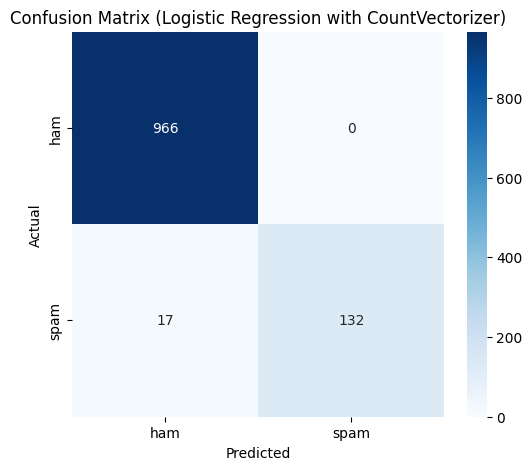

Confusion Matrix generated and visualized.

Classification Report (Logistic Regression with CountVectorizer):
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       966
        spam       1.00      0.89      0.94       149

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.97      1115
weighted avg       0.99      0.98      0.98      1115

Classification Report printed.


In [8]:
from sklearn.linear_model import LogisticRegression

print("LogisticRegression imported successfully.")

# Initialize Logistic Regression classifier
# Set solver='liblinear' for better convergence with sparse data
lr_count_model = LogisticRegression(solver='liblinear', random_state=42)
print("Logistic Regression classifier initialized.")

# Train the model
lr_count_model.fit(X_train_count, y_train)
print("Logistic Regression model trained using CountVectorizer features.")

# Make predictions on the test set
y_pred_lr_count = lr_count_model.predict(X_test_count)
print("Predictions made on the test set.")

# Calculate and print accuracy score
accuracy_lr_count = accuracy_score(y_test, y_pred_lr_count)
print(f"\nAccuracy Score (Logistic Regression with CountVectorizer): {accuracy_lr_count:.4f}")

# Generate and visualize confusion matrix
cm_lr_count = confusion_matrix(y_test, y_pred_lr_count)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_lr_count, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.title('Confusion Matrix (Logistic Regression with CountVectorizer)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("Confusion Matrix generated and visualized.")

# Print classification report
print("\nClassification Report (Logistic Regression with CountVectorizer):")
print(classification_report(y_test, y_pred_lr_count, target_names=['ham', 'spam']))
print("Classification Report printed.")

Necessary modules imported: train_test_split, MultinomialNB, accuracy_score, confusion_matrix, classification_report, seaborn, matplotlib.pyplot.

Data split into training and testing sets for TF-IDF. Training samples: 4457, Testing samples: 1115.
Multinomial Naive Bayes classifier initialized for TF-IDF features.
Multinomial Naive Bayes model trained using TF-IDF features.
Predictions made on the test set using TF-IDF features.

Accuracy Score (TF-IDF Naive Bayes): 0.9704


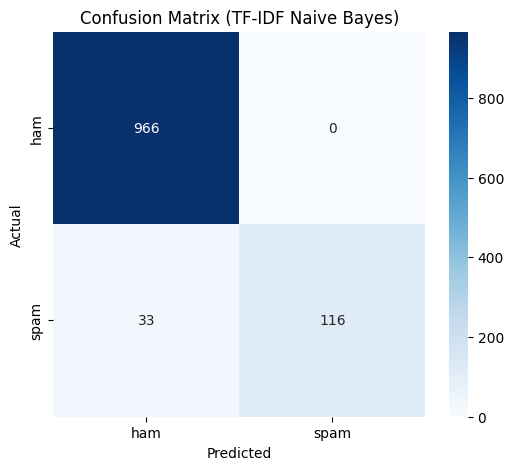

Confusion Matrix generated and visualized for TF-IDF Naive Bayes.

Classification Report (TF-IDF Naive Bayes):
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       966
        spam       1.00      0.78      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115

Classification Report printed for TF-IDF Naive Bayes.


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

print("Necessary modules imported: train_test_split, MultinomialNB, accuracy_score, confusion_matrix, classification_report, seaborn, matplotlib.pyplot.")

# Split data into training and testing sets for TF-IDF features
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
print(f"\nData split into training and testing sets for TF-IDF. Training samples: {X_train_tfidf.shape[0]}, Testing samples: {X_test_tfidf.shape[0]}.")

# Initialize Multinomial Naive Bayes classifier
nb_tfidf_model = MultinomialNB()
print("Multinomial Naive Bayes classifier initialized for TF-IDF features.")

# Train the model
nb_tfidf_model.fit(X_train_tfidf, y_train)
print("Multinomial Naive Bayes model trained using TF-IDF features.")

# Make predictions on the test set
y_pred_tfidf = nb_tfidf_model.predict(X_test_tfidf)
print("Predictions made on the test set using TF-IDF features.")

# Calculate and print accuracy score
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
print(f"\nAccuracy Score (TF-IDF Naive Bayes): {accuracy_tfidf:.4f}")

# Generate and visualize confusion matrix
cm_tfidf = confusion_matrix(y_test, y_pred_tfidf)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_tfidf, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.title('Confusion Matrix (TF-IDF Naive Bayes)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("Confusion Matrix generated and visualized for TF-IDF Naive Bayes.")

# Print classification report
print("\nClassification Report (TF-IDF Naive Bayes):")
print(classification_report(y_test, y_pred_tfidf, target_names=['ham', 'spam']))
print("Classification Report printed for TF-IDF Naive Bayes.")

Necessary modules imported: LogisticRegression, accuracy_score, confusion_matrix, classification_report, seaborn, matplotlib.pyplot.

Data split into training and testing sets for TF-IDF Logistic Regression. Training samples: 4457, Testing samples: 1115.
Logistic Regression classifier initialized for TF-IDF features.
Logistic Regression model trained using TF-IDF features.
Predictions made on the test set using TF-IDF features.

Accuracy Score (Logistic Regression with TF-IDF): 0.9552


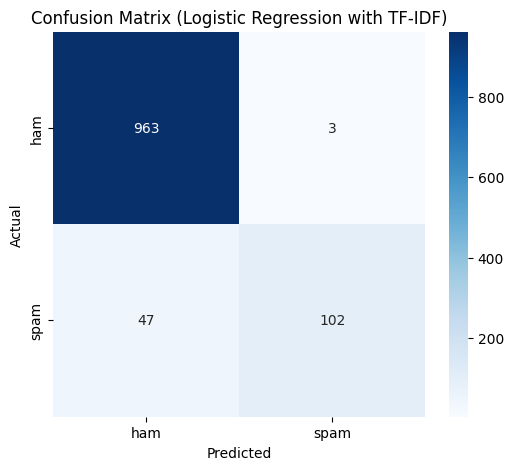

Confusion Matrix generated and visualized for Logistic Regression with TF-IDF.

Classification Report (Logistic Regression with TF-IDF):
              precision    recall  f1-score   support

         ham       0.95      1.00      0.97       966
        spam       0.97      0.68      0.80       149

    accuracy                           0.96      1115
   macro avg       0.96      0.84      0.89      1115
weighted avg       0.96      0.96      0.95      1115

Classification Report printed for Logistic Regression with TF-IDF.


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

print("Necessary modules imported: LogisticRegression, accuracy_score, confusion_matrix, classification_report, seaborn, matplotlib.pyplot.")

# Ensure y and X_tfidf are available, as they were created in previous steps.
# Re-splitting data for Logistic Regression to ensure consistency with current subtask flow, though y_train/y_test were already available.
X_train_tfidf_lr, X_test_tfidf_lr, y_train_lr, y_test_lr = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
print(f"\nData split into training and testing sets for TF-IDF Logistic Regression. Training samples: {X_train_tfidf_lr.shape[0]}, Testing samples: {X_test_tfidf_lr.shape[0]}.")

# Initialize Logistic Regression classifier
lr_tfidf_model = LogisticRegression(solver='liblinear', random_state=42)
print("Logistic Regression classifier initialized for TF-IDF features.")

# Train the model
lr_tfidf_model.fit(X_train_tfidf_lr, y_train_lr)
print("Logistic Regression model trained using TF-IDF features.")

# Make predictions on the test set
y_pred_lr_tfidf = lr_tfidf_model.predict(X_test_tfidf_lr)
print("Predictions made on the test set using TF-IDF features.")

# Calculate and print accuracy score
accuracy_lr_tfidf = accuracy_score(y_test_lr, y_pred_lr_tfidf)
print(f"\nAccuracy Score (Logistic Regression with TF-IDF): {accuracy_lr_tfidf:.4f}")

# Generate and visualize confusion matrix
cm_lr_tfidf = confusion_matrix(y_test_lr, y_pred_lr_tfidf)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_lr_tfidf, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.title('Confusion Matrix (Logistic Regression with TF-IDF)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("Confusion Matrix generated and visualized for Logistic Regression with TF-IDF.")

# Print classification report
print("\nClassification Report (Logistic Regression with TF-IDF):")
print(classification_report(y_test_lr, y_pred_lr_tfidf, target_names=['ham', 'spam']))
print("Classification Report printed for Logistic Regression with TF-IDF.")

In [11]:
from sklearn.metrics import classification_report
import pandas as pd

# Re-calculate classification reports as dictionaries
report_nb_count = classification_report(y_test, y_pred_count, target_names=['ham', 'spam'], output_dict=True)
report_lr_count = classification_report(y_test, y_pred_lr_count, target_names=['ham', 'spam'], output_dict=True)
report_nb_tfidf = classification_report(y_test, y_pred_tfidf, target_names=['ham', 'spam'], output_dict=True)
report_lr_tfidf = classification_report(y_test_lr, y_pred_lr_tfidf, target_names=['ham', 'spam'], output_dict=True)

# Prepare data for the comparison DataFrame
metrics_data = {
    'Naive Bayes (CountVectorizer)': {
        'Accuracy': report_nb_count['accuracy'],
        'Ham_Precision': report_nb_count['ham']['precision'],
        'Ham_Recall': report_nb_count['ham']['recall'],
        'Ham_F1-score': report_nb_count['ham']['f1-score'],
        'Spam_Precision': report_nb_count['spam']['precision'],
        'Spam_Recall': report_nb_count['spam']['recall'],
        'Spam_F1-score': report_nb_count['spam']['f1-score'],
    },
    'Logistic Regression (CountVectorizer)': {
        'Accuracy': report_lr_count['accuracy'],
        'Ham_Precision': report_lr_count['ham']['precision'],
        'Ham_Recall': report_lr_count['ham']['recall'],
        'Ham_F1-score': report_lr_count['ham']['f1-score'],
        'Spam_Precision': report_lr_count['spam']['precision'],
        'Spam_Recall': report_lr_count['spam']['recall'],
        'Spam_F1-score': report_lr_count['spam']['f1-score'],
    },
    'Naive Bayes (TF-IDF)': {
        'Accuracy': report_nb_tfidf['accuracy'],
        'Ham_Precision': report_nb_tfidf['ham']['precision'],
        'Ham_Recall': report_nb_tfidf['ham']['recall'],
        'Ham_F1-score': report_nb_tfidf['ham']['f1-score'],
        'Spam_Precision': report_nb_tfidf['spam']['precision'],
        'Spam_Recall': report_nb_tfidf['spam']['recall'],
        'Spam_F1-score': report_nb_tfidf['spam']['f1-score'],
    },
    'Logistic Regression (TF-IDF)': {
        'Accuracy': report_lr_tfidf['accuracy'],
        'Ham_Precision': report_lr_tfidf['ham']['precision'],
        'Ham_Recall': report_lr_tfidf['ham']['recall'],
        'Ham_F1-score': report_lr_tfidf['ham']['f1-score'],
        'Spam_Precision': report_lr_tfidf['spam']['precision'],
        'Spam_Recall': report_lr_tfidf['spam']['recall'],
        'Spam_F1-score': report_lr_tfidf['spam']['f1-score'],
    }
}

# Create the comparison DataFrame
comparison_df = pd.DataFrame.from_dict(metrics_data, orient='index')

# Display the comparison DataFrame
print("\nComparison of Model Performance:")
print(comparison_df.round(4))



Comparison of Model Performance:
                                       Accuracy  Ham_Precision  Ham_Recall  \
Naive Bayes (CountVectorizer)            0.9749         0.9916      0.9793   
Logistic Regression (CountVectorizer)    0.9848         0.9827      1.0000   
Naive Bayes (TF-IDF)                     0.9704         0.9670      1.0000   
Logistic Regression (TF-IDF)             0.9552         0.9535      0.9969   

                                       Ham_F1-score  Spam_Precision  \
Naive Bayes (CountVectorizer)                0.9854          0.8758   
Logistic Regression (CountVectorizer)        0.9913          1.0000   
Naive Bayes (TF-IDF)                         0.9832          1.0000   
Logistic Regression (TF-IDF)                 0.9747          0.9714   

                                       Spam_Recall  Spam_F1-score  
Naive Bayes (CountVectorizer)               0.9463         0.9097  
Logistic Regression (CountVectorizer)       0.8859         0.9395  
Naive Bayes (TF

In [12]:
import pandas as pd

# Choose the best performing model and vectorizer combination
# Based on the comparison_df, Logistic Regression with CountVectorizer showed the highest accuracy.
selected_model = lr_count_model
selected_vectorizer = count_vectorizer

print("Chosen Model: Logistic Regression with CountVectorizer")

# Get feature names from the chosen vectorizer
feature_names = selected_vectorizer.get_feature_names_out()
print(f"Number of features (words): {len(feature_names)}")

# Get coefficients from the chosen model. For binary classification, coef_ is usually 1D or 2D with shape (1, n_features).
# We take the first (and only) row of coefficients.
coefficients = selected_model.coef_[0]

# Create a pandas Series mapping feature names to their coefficients
word_coefficients = pd.Series(coefficients, index=feature_names)
print("Word coefficients extracted and mapped.")

# Identify the top 10 words most indicative of 'spam' (positive coefficients)
# Spam corresponds to the positive class (1), so positive coefficients contribute to spam.
top_n = 10
top_spam_words = word_coefficients.nlargest(top_n)

print(f"\nTop {top_n} words most indicative of SPAM:")
print(top_spam_words)

# Identify the top 10 words most indicative of 'ham' (negative coefficients)
# Ham corresponds to the negative class (0), so negative coefficients contribute to ham.
top_ham_words = word_coefficients.nsmallest(top_n)

print(f"\nTop {top_n} words most indicative of HAM:")
print(top_ham_words)

Chosen Model: Logistic Regression with CountVectorizer
Number of features (words): 9437
Word coefficients extracted and mapped.

Top 10 words most indicative of SPAM:
txt         2.043090
claim       1.846122
ringtone    1.814848
call        1.728842
text        1.610517
stop        1.600374
mobile      1.588360
new         1.574658
reply       1.574426
service     1.539559
dtype: float64

Top 10 words most indicative of HAM:
ltgt    -1.307568
ill     -1.206151
sir     -1.012022
im      -0.967666
later   -0.918325
ok      -0.871531
sorry   -0.831977
oh      -0.717826
home    -0.705858
da      -0.694962
dtype: float64
